In [1]:
from keras.callbacks import ModelCheckpoint
from glob import glob
import random
import os
import matplotlib.pyplot as plt
%matplotlib inline

from model_arch import hed
from utils import util_train

Using TensorFlow backend.
2024-08-13 23:49:53.861488: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer.so.6'; dlerror: libnvinfer.so.6: cannot open shared object file: No such file or directory
2024-08-13 23:49:53.861555: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer_plugin.so.6'; dlerror: libnvinfer_plugin.so.6: cannot open shared object file: No such file or directory
2024-08-13 23:49:53.861560: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:30] Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


In [2]:
model = hed.hed()

2024-08-13 23:49:55.345603: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-08-13 23:49:55.345633: E tensorflow/stream_executor/cuda/cuda_driver.cc:351] failed call to cuInit: UNKNOWN ERROR (303)
2024-08-13 23:49:55.345649: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ip-172-31-13-133.us-west-1.compute.internal): /proc/driver/nvidia/version does not exist
2024-08-13 23:49:55.345797: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2024-08-13 23:49:55.351310: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2299995000 Hz
2024-08-13 23:49:55.352016: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5629e0e30d80 initialized for platform Ho

----- model_arch/weights/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5


## DataGenerator

In [3]:
image_names = [os.path.basename(filepath) for filepath in glob("example_data/SAX/sax_images/*.npy")]

# Randomly take 80% of the data for training and 20% for validation
random.shuffle(image_names)
X_train = image_names[:int(len(image_names)*0.8)]
X_val = image_names[int(len(image_names)*0.8):]

size_of_training = len(X_train)
size_of_validation = len(X_val)

print(f'Training size: {size_of_training}')
print(f'Validation size: {size_of_validation}')

Training size: 8
Validation size: 2


In [4]:
HEIGHT = 480
WIDTH = 480
KERNEL = (3,3)
BATCH_SIZE = 8
N_CHANNELS = 1

In [5]:
# Construct the training image generator for data augmentation

train_DataGenerator = util_train.DataGenerator(
    list_IDs=X_train,
    labels=X_train,
    path_img='example_data/SAX/sax_images/',
    path_label='example_data/SAX/sax_hough_circle_labels/',
    path_self_learning=None,
    batch_size=BATCH_SIZE,
    dim=(HEIGHT, WIDTH),
    n_channels=N_CHANNELS,
    shuffle=True,
    augment=False,
    model=None,
    saxmid=True
    )

val_DataGenerator = util_train.DataGenerator(
    list_IDs=X_val,
    labels=X_val,
    path_img='example_data/SAX/sax_images/',
    path_label='example_data/SAX/sax_hough_circle_labels/',
    path_self_learning=None,
    batch_size=BATCH_SIZE,
    dim=(HEIGHT, WIDTH),
    n_channels=N_CHANNELS,
    shuffle=True,
    augment=False,
    model=None,
    saxmid=True
    )

float64 float64


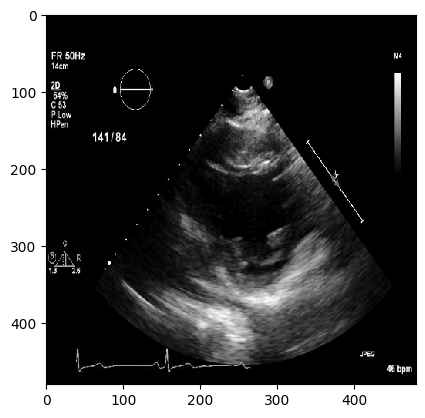

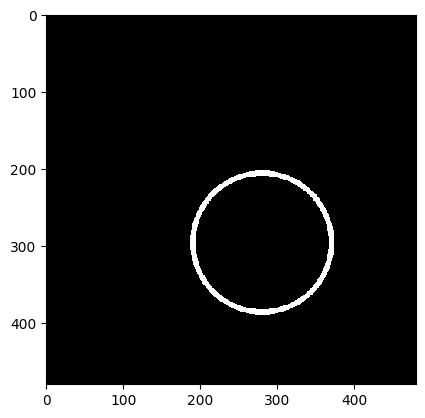

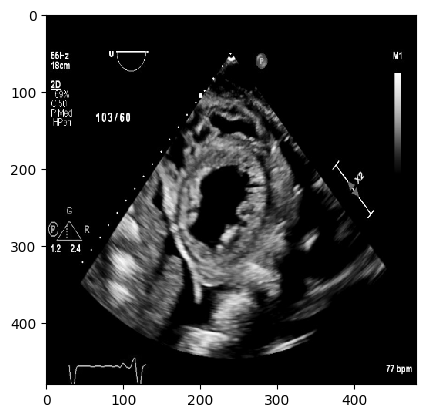

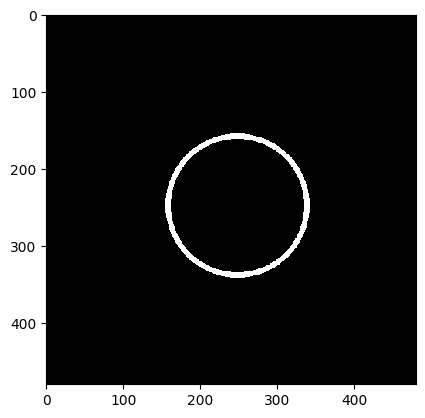

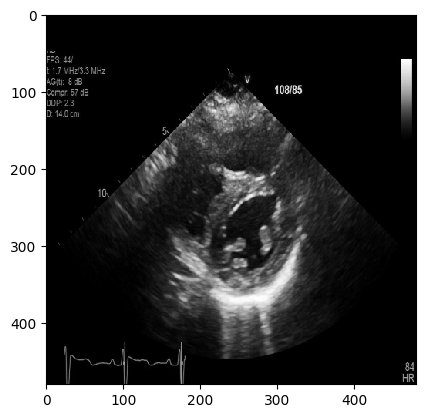

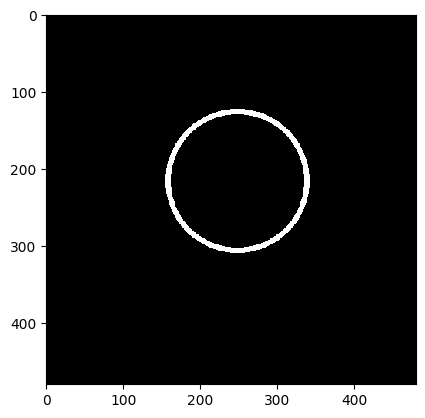

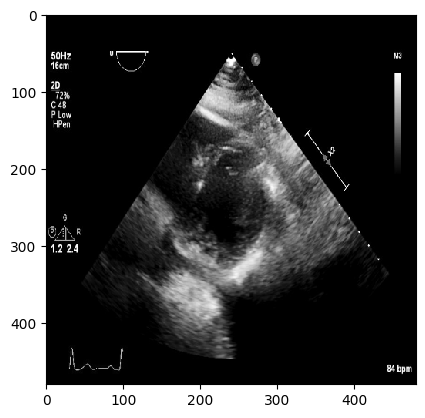

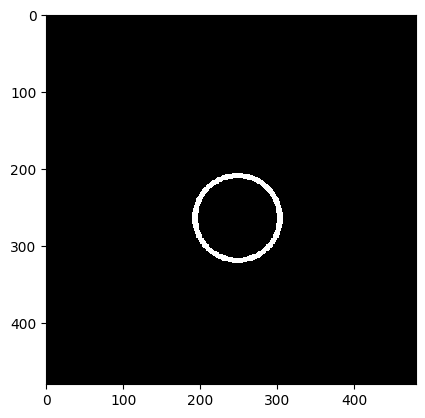

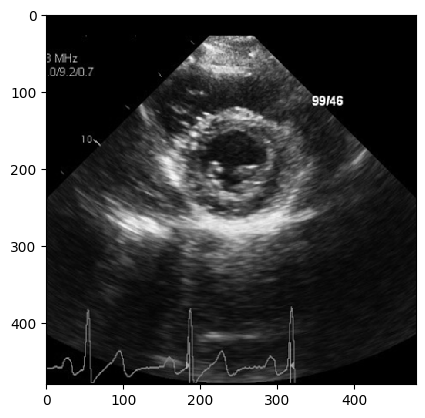

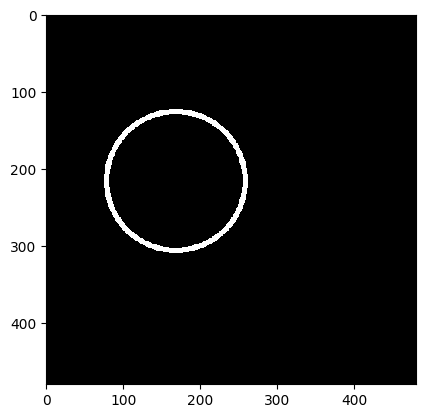

In [6]:
x, y = train_DataGenerator.__getitem__(0)
print(x.dtype,y[0].dtype)
for k in range(5):  # This is only two because our validation dataset is 2 images. Change to view more examples with larger dataset.
    plt.imshow(x[k,...,0], cmap='gray')
    plt.show()
    plt.imshow(y[0][k,...,0], cmap = 'gray')
    plt.show()

In [7]:
path_w = 'example_model_checkpoints/SAX/step2_hed_label_hough_circle_{epoch:02d}.h5'
checkpoint = ModelCheckpoint(path_w, monitor='val_loss', verbose=1, save_best_only=False, mode='min')


EPOCHS = 20
hist = model.fit_generator(generator = train_DataGenerator,
                           verbose=0,   # We have to disable prog bar because our validation set is so small, but you can remove this line when using more data to see training progress
                           steps_per_epoch = size_of_training//BATCH_SIZE,
                           validation_data = val_DataGenerator,
                           callbacks=[checkpoint],
                           use_multiprocessing = False, 
                           validation_steps = max(1,size_of_validation//BATCH_SIZE), 
                           epochs=EPOCHS, shuffle=True)


2024-08-13 23:50:01.567259: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 471859200 exceeds 10% of system memory.
2024-08-13 23:50:01.757846: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 471859200 exceeds 10% of system memory.
2024-08-13 23:50:07.272713: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 471859200 exceeds 10% of system memory.
2024-08-13 23:50:19.014399: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 471859200 exceeds 10% of system memory.
2024-08-13 23:50:19.615503: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 471859200 exceeds 10% of system memory.



Epoch 00001: saving model to example_model_checkpoints/SAX/step2_hed_label_hough_circle_01.h5

Epoch 00002: saving model to example_model_checkpoints/SAX/step2_hed_label_hough_circle_02.h5

Epoch 00003: saving model to example_model_checkpoints/SAX/step2_hed_label_hough_circle_03.h5

Epoch 00004: saving model to example_model_checkpoints/SAX/step2_hed_label_hough_circle_04.h5

Epoch 00005: saving model to example_model_checkpoints/SAX/step2_hed_label_hough_circle_05.h5

Epoch 00006: saving model to example_model_checkpoints/SAX/step2_hed_label_hough_circle_06.h5

Epoch 00007: saving model to example_model_checkpoints/SAX/step2_hed_label_hough_circle_07.h5

Epoch 00008: saving model to example_model_checkpoints/SAX/step2_hed_label_hough_circle_08.h5

Epoch 00009: saving model to example_model_checkpoints/SAX/step2_hed_label_hough_circle_09.h5

Epoch 00010: saving model to example_model_checkpoints/SAX/step2_hed_label_hough_circle_10.h5

Epoch 00011: saving model to example_model_checkp

In [8]:
model.save('example_models/SAX/step2_hed_label_hough_circle.h5')